In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

In [3]:
df1 = pd.read_csv('data_out_randomness_snow/snowSeason_n_sattel-hochstuckli.csv')
df2 = pd.read_csv('data_out_randomness_snow/snowSeason_n_Atzmaening.csv')
df3 = pd.read_csv('data_out_randomness_snow/snowSeason_n_hoch-brig.csv')
#df4 = pd.read_csv('data_out_snow/snowSeason_villars-diablerets.csv')
df5 = pd.read_csv('data_out_randomness_snow/snowSeason_n_champex.csv')
#df6 = pd.read_csv('data_out_snow/snowSeason_davos.csv')

In [4]:
# Setting the columns and row maxium display
pd.set_option('display.max_columns',69)

In [5]:
df1Columns= df1.columns
df2Columns= df2.columns
df3Columns= df3.columns
#df4Columns= df4.columns
df5Columns= df5.columns
#df6Columns= df6.columns

In [16]:
#Making filter for databases
filt1 = df1.columns.str.contains('sc_26')
filt2 = df1.columns.str.contains('sc_45')
filt3 = df1.columns.str.contains('sc_85')

filt4 = df2.columns.str.contains('sc_26')
filt5 = df2.columns.str.contains('sc_45')
filt6 = df2.columns.str.contains('sc_85')

filt7 = df3.columns.str.contains('sc_26')
filt8 = df3.columns.str.contains('sc_45')
filt9 = df3.columns.str.contains('sc_85')

#filt10 = df4.columns.str.contains('RCP26')
#filt11 = df4.columns.str.contains('RCP45')
#filt12 = df4.columns.str.contains('RCP85')

filt13 = df5.columns.str.contains('sc_26')
filt14 = df5.columns.str.contains('sc_45')
filt15 = df5.columns.str.contains('sc_85')

#filt16 = df6.columns.str.contains('RCP26')
#filt17 = df6.columns.str.contains('RCP45')
#filt18 = df6.columns.str.contains('RCP85')

###
df1RCP26 = df1.loc[:, filt1]
df1RCP45 = df1.loc[:, filt2]
df1RCP85 = df1.loc[:, filt3]

df2RCP26 = df2.loc[:, filt4]
df2RCP45 = df2.loc[:, filt5]
df2RCP85 = df2.loc[:, filt6]

df3RCP26 = df3.loc[:, filt7]
df3RCP45 = df3.loc[:, filt8]
df3RCP85 = df3.loc[:, filt9]

#df4RCP26 = df4.loc[:, filt10]
#df4RCP45 = df4.loc[:, filt11]
#df4RCP85 = df4.loc[:, filt12]

df5RCP26 = df5.loc[:, filt13]
df5RCP45 = df5.loc[:, filt14]
df5RCP85 = df5.loc[:, filt15]

#df6RCP26 = df6.loc[:, filt16]
#df6RCP45 = df6.loc[:, filt17]
#df6RCP85 = df6.loc[:, filt18]

In [17]:
df1RCP26Columns= df1RCP26.columns
df2RCP26Columns= df2RCP26.columns
df3RCP26Columns= df3RCP26.columns
#df4RCP26Columns= df4RCP26.columns
df5RCP26Columns= df5RCP26.columns
#df6RCP26Columns= df6RCP26.columns

df1RCP45Columns= df1RCP45.columns
df2RCP45Columns= df2RCP45.columns
df3RCP45Columns= df3RCP45.columns
#df4RCP45Columns= df4RCP45.columns
df5RCP45Columns= df5RCP45.columns
#df6RCP45Columns= df6RCP45.columns

df1RCP85Columns= df1RCP85.columns
df2RCP85Columns= df2RCP85.columns
df3RCP85Columns= df3RCP85.columns
#df4RCP85Columns= df4RCP85.columns
df5RCP85Columns= df5RCP85.columns
#df6RCP85Columns= df6RCP85.columns



In [18]:
df1RCP85.shape

(118, 31)

In [19]:
#df6.head(3)

In [20]:
#df6RCP26.apply(lambda x : x.min())

In [21]:
#dfsColumns = [df1Columns, df2Columns, df3Columns, df4Columns, df5Columns, df6Columns]
dfsColumns = [df1Columns, df2Columns, df3Columns, df5Columns]
#dfs = [df1, df2, df3, df4, df5, df6]
dfs = [df1, df2, df3, df5]

### Analysis 1-1: Run and visualize 68 CH2018 scenarios, and the associated  seasonal situation of six ski resorts

In [22]:
def generate_plot_all(df, dfColumns, m, n, colorLines):
    for i in range (1 , len(dfColumns), 1):
        #res1_sc1 = df[dfColumns[i]]
        axs[m,n].plot(x_axis, df[dfColumns[i]], color=colorLines, linestyle = '--', alpha=0.02)
        return
        
def generate_plot_max_min(df, m, n, BotYaxis, TopYaxis,fig_Title, fig_X_Lable, fig_Y_Lable):
    
    axs[m,n].axhline(y=100, color='red')
    axs[m,n].set_ylim(bottom=BotYaxis, top =TopYaxis)
    axs[m,n].set_title(fig_Title)
    axs[m,n].set_xlabel(fig_X_Lable)
    axs[m,n].set_ylabel(fig_Y_Lable)
        
        
    axs[m,n].plot(x_axis, df.max(axis=1), color='blue', linestyle = '--', alpha=0.8)
    axs[m,n].plot(x_axis, df.min(axis=1), color='red', linestyle = '--', alpha=0.8)
    axs[m,n].fill_between(x_axis[0:118], df.max(axis=1), df.min(axis=1), alpha=0.15, color='C1')
        #plt.xticks(np.arange(1981, 2099, step=20))
         #Possible Colors: color='#DBFF33',
    return

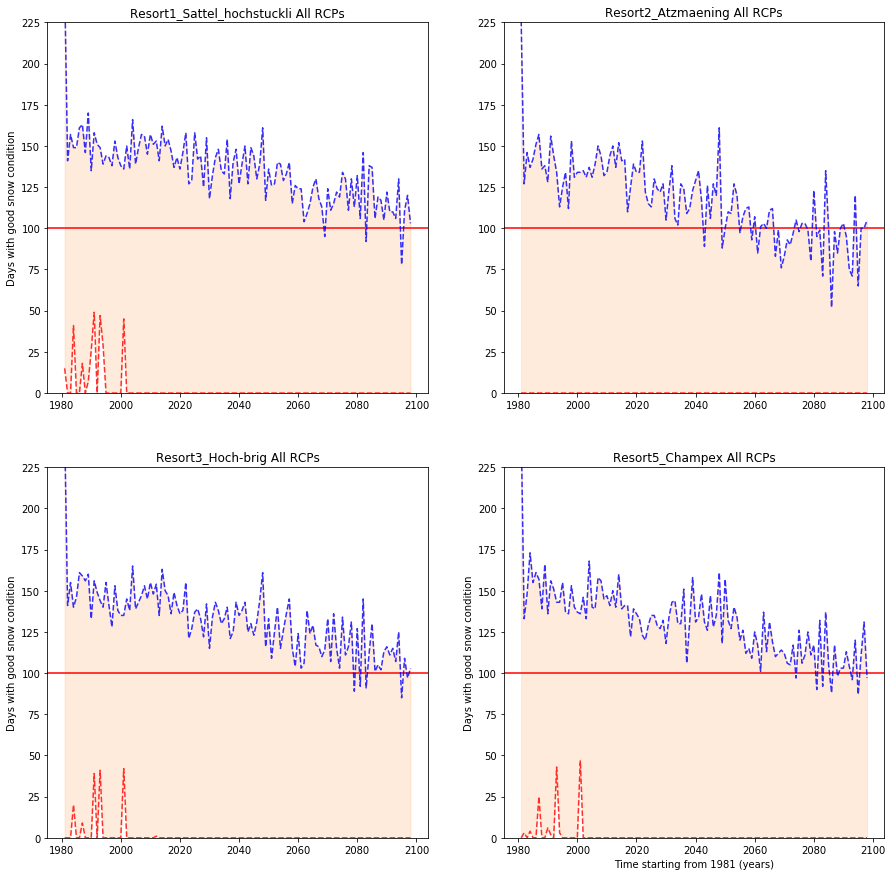

In [23]:
#fig, (ax1 , ax2) = plt.subplots(1, 2)
m = 2
n = 2
fig, axs = plt.subplots(m, n, figsize=(15,15))

lengthSim = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP = "All RCPs"
generate_plot_max_min(df1, 0,0,0,225, 'Resort1_Sattel_hochstuckli {}'.format(RCP),"","Days with good snow condition")
generate_plot_max_min(df2, 0,1,0,225, 'Resort2_Atzmaening {}'.format(RCP),"","")
generate_plot_max_min(df3, 1,0,0,225, 'Resort3_Hoch-brig {}'.format(RCP),"","Days with good snow condition")
#generate_plot_max_min(df4, 1,1,0,300, 'Resort4_Villars-diablerets {}'.format(RCP),"","")
generate_plot_max_min(df5, 1,1,0,225, 'Resort5_Champex {}'.format(RCP),"Time starting from 1981 (years)","Days with good snow condition")
#generate_plot_max_min(df6, 2,1,0,300, 'Resort6_Davos {}'.format(RCP),"Time starting from 1981 (years)","")

plt.show()

### Analysis 1-2: Run and visualize 12 CH2018 RCP 2.6 scenarios, and the associated  seasonal situation of six ski resorts

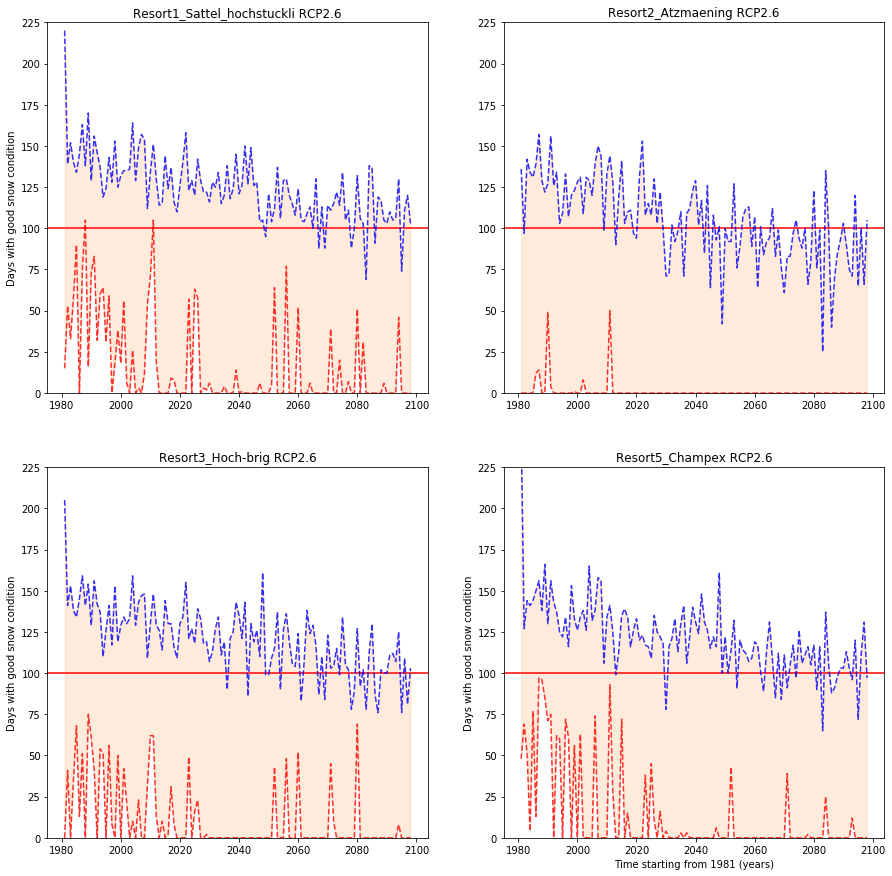

In [24]:
#fig, (ax1 , ax2) = plt.subplots(1, 2)
m = 2
n = 2
fig, axs = plt.subplots(m, n, figsize=(15,15))

y = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP ="RCP2.6"
generate_plot_max_min(df1RCP26,0,0,0,225, 'Resort1_Sattel_hochstuckli {}'.format(RCP),"","Days with good snow condition")
generate_plot_max_min(df2RCP26,0,1,0,225, 'Resort2_Atzmaening {}'.format(RCP),"","")
generate_plot_max_min(df3RCP26,1,0,0,225, 'Resort3_Hoch-brig {}'.format(RCP),"","Days with good snow condition")
#generate_plot_max_min(df4RCP26,1,1,0,300, 'Resort4_Villars-diablerets {}'.format(RCP),"","")
generate_plot_max_min(df5RCP26,1,1,0,225, 'Resort5_Champex {}'.format(RCP),"Time starting from 1981 (years)","Days with good snow condition")
#generate_plot_max_min(df6RCP26,2,1,0,300, 'Resort6_Davos {}'.format(RCP),"Time starting from 1981 (years)","")

plt.show()

### Analysis 1-3: Run and visualize 12 CH2018 RCP 4.5 scenarios, and the associated  seasonal situation of six ski resorts

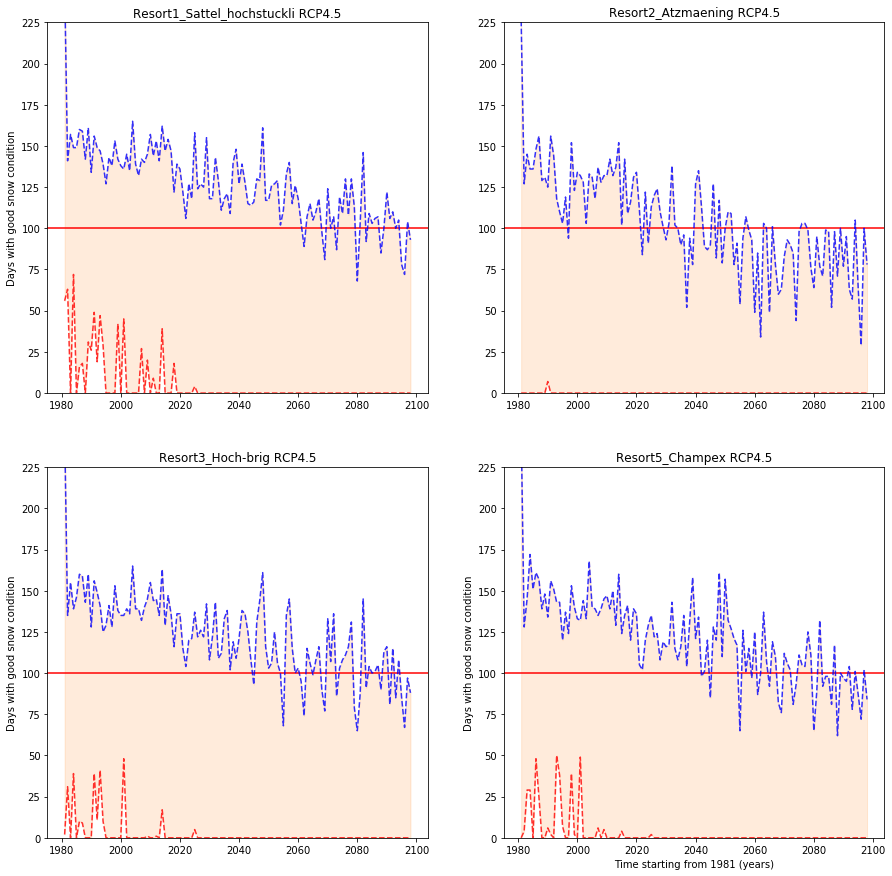

In [25]:
#fig, (ax1 , ax2) = plt.subplots(1, 2)
m = 2
n = 2
fig, axs = plt.subplots(m, n, figsize=(15,15))
y = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP ="RCP4.5"
generate_plot_max_min(df1RCP45, 0,0,0,225, 'Resort1_Sattel_hochstuckli {}'.format(RCP),"","Days with good snow condition")
generate_plot_max_min(df2RCP45, 0,1,0,225, 'Resort2_Atzmaening {}'.format(RCP),"","")
generate_plot_max_min(df3RCP45, 1,0,0,225, 'Resort3_Hoch-brig {}'.format(RCP),"","Days with good snow condition")
#generate_plot_max_min(df4RCP45, 1,1,0,300, 'Resort4_Villars-diablerets {}'.format(RCP),"","")
generate_plot_max_min(df5RCP45, 1,1,0,225, 'Resort5_Champex {}'.format(RCP),"Time starting from 1981 (years)","Days with good snow condition")
#generate_plot_max_min(df6RCP45, 2,1,0,300, 'Resort6_Davos {}'.format(RCP),"Time starting from 1981 (years)","")

plt.show()

### Analysis 1-4: Run and visualize 31 CH2018 RCP 8.5 scenarios, and the associated  seasonal situation of six ski resorts

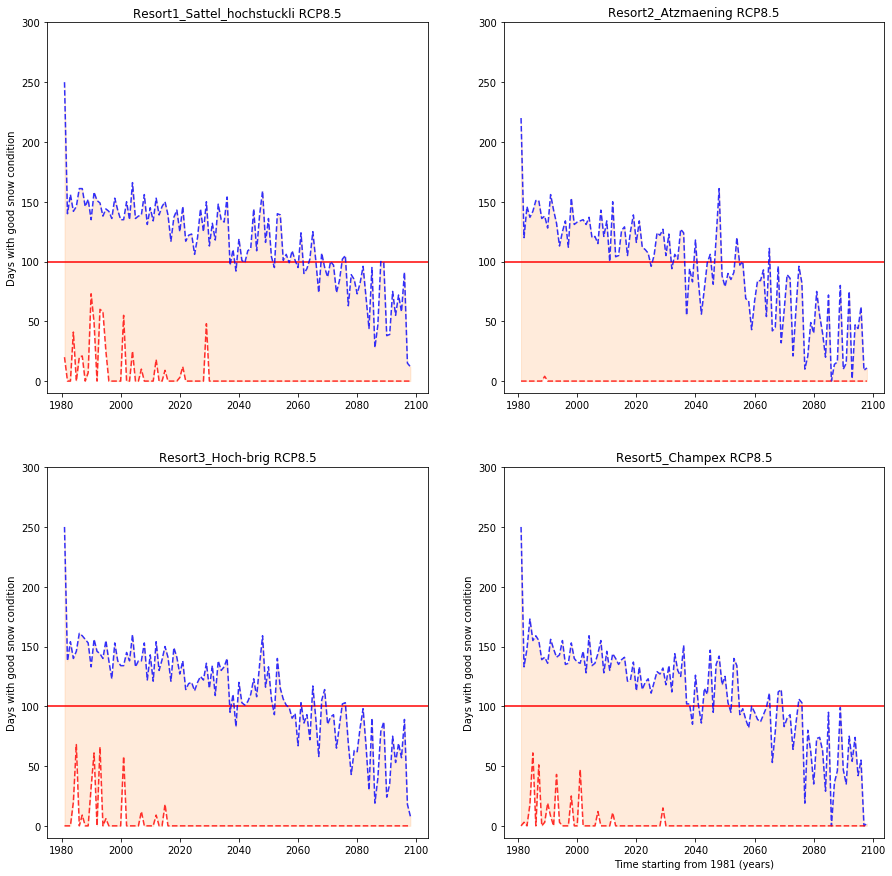

In [26]:
m = 2
n = 2
fig, axs = plt.subplots(m, n, figsize=(15,15))
y = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)        
#plt.style.use('seaborn')

RCP = "RCP8.5"
generate_plot_max_min(df1RCP85, 0,0,-10,300, 'Resort1_Sattel_hochstuckli {}'.format(RCP) ,"","Days with good snow condition")
generate_plot_max_min(df2RCP85, 0,1,-10,300, 'Resort2_Atzmaening {}'.format(RCP),"","")
generate_plot_max_min(df3RCP85, 1,0,-10,300, 'Resort3_Hoch-brig {}'.format(RCP),"","Days with good snow condition")
#generate_plot_max_min(df4RCP85, 1,1,-10,300, 'Resort4_Villars-diablerets {}'.format(RCP),"","")
generate_plot_max_min(df5RCP85, 1,1,-10,300, 'Resort5_Champex {}'.format(RCP),"Time starting from 1981 (years)","Days with good snow condition")
#generate_plot_max_min(df6RCP85, 2,1,-10,300, 'Resort6_Davos {}'.format(RCP),"Time starting from 1981 (years)","")

plt.show()

### Analysis 2:Uncertainty analysis of CH2018 scenarios, for six ski resorts

In [27]:
def area_max_min_df (df, lengthSim):

    max_scenario = np.array(df.max(axis=1))
    min_scenario = np.array(df.min(axis=1))
    
    # Compute the area using the composite trapezoidal rule.
    areamax1 = trapz(max_scenario, dx=1)
    areamin1 = trapz(min_scenario, dx=1)
    Uncertainty1 = ((areamax1 + areamin1)/2 )/ lengthSim
    
    # Compute the area using the composite Simpson's rule.
    areamax2 = simps(max_scenario, dx=1)
    areamin2 = simps(min_scenario, dx=1)
    Uncertainty2 = ((areamax2 + areamin2)/2 )/ lengthSim
    
    print("Start" + "**" * 30)
    print("Uncertainty Band1 ={} {}".format(Decimal(str(Uncertainty1)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("Uncertainty Band2 ={} {}".format(Decimal(str(Uncertainty2)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("**" * 20 +"End" + "\n")

    return
    #return    max_scenario, min_scenario, Uncertainty1, Uncertainty2

In [28]:
max_scenario = df1RCP26.max(axis=1)
min_scenario = df1RCP26.min(axis=1)

In [29]:
max_scenario.to_numpy()

array([220, 139, 152, 140, 134, 145, 163, 138, 170, 129, 156, 146, 137,
       119, 124, 143, 128, 153, 125, 132, 135, 135, 136, 164, 129, 149,
       157, 154, 112, 134, 151, 130, 114, 115, 144, 124, 137, 116, 110,
       126, 140, 158, 123, 129, 120, 142, 129, 122, 122, 116, 128, 125,
       134, 115, 120, 138, 118, 124, 145, 121, 126, 150, 127, 149, 126,
       128, 104, 105,  95, 121, 104, 112, 137, 106, 129, 130, 120, 115,
       108, 124, 105, 104, 109, 113, 100, 130,  88, 113,  88, 114, 111,
       115, 122, 114, 134, 105, 111,  88, 100, 132, 106, 103,  69, 138,
       137,  91, 119, 117, 105, 103, 110, 105, 106, 130,  74, 111, 120,
       103], dtype=int64)

In [30]:
type(max_scenario)

pandas.core.series.Series

In [31]:
max_scenario.shape

(118,)

In [32]:
print("Resort1")
area_max_min_df (df1RCP26, 118)
area_max_min_df (df1RCP45, 118)
area_max_min_df (df1RCP85, 118)

print("Resort2")
area_max_min_df (df2RCP26, 118)
area_max_min_df (df2RCP45, 118)
area_max_min_df (df2RCP85, 118)

print("Resort3")
area_max_min_df (df3RCP26, 118)
area_max_min_df (df3RCP45, 118)
area_max_min_df (df3RCP85, 118)

#print("Resort4")
#area_max_min_df (df4RCP26, 118)
#area_max_min_df (df4RCP45, 118)
#area_max_min_df (df4RCP85, 118)

print("Resort5")
area_max_min_df (df5RCP26, 118)
area_max_min_df (df5RCP45, 118)
area_max_min_df (df5RCP85, 118)

#print("Resort6")
#area_max_min_df (df6RCP26, 118)
#area_max_min_df (df6RCP45, 118)
#area_max_min_df (df6RCP85, 118)

Resort1
Start************************************************************
Uncertainty Band1 =69.63 days
Uncertainty Band2 =69.62 days
****************************************End

Start************************************************************
Uncertainty Band1 =65.03 days
Uncertainty Band2 =65.00 days
****************************************End

Start************************************************************
Uncertainty Band1 =59.62 days
Uncertainty Band2 =59.57 days
****************************************End

Resort2
Start************************************************************
Uncertainty Band1 =52.53 days
Uncertainty Band2 =52.50 days
****************************************End

Start************************************************************
Uncertainty Band1 =51.40 days
Uncertainty Band2 =51.38 days
****************************************End

Start************************************************************
Uncertainty Band1 =46.73 days
Uncertainty Band2 =46.70 days
***

### Analysis 3: Visualization of tipping points for 68 CH2018 scenarios in six ski resorts

In [33]:
def tipping_points_freq(df):
    """
    This function, calculates the frequency of tipping points for each individual resort
    """
    dfColumns= df.columns
    
    scenarios_length= len(dfColumns)
    simulations_Length = len(df[dfColumns[1]])
    tipping_freq = np.zeros(scenarios_length)
    
    for i in range (1, scenarios_length, 1):
        m = 0
        for j in range (0 , simulations_Length, 1):
            if df[dfColumns[i]].iloc[j] < 100:
                m += 1
                if m == 3:
                    tipping_freq[i] += 1
                    m = 0
            else:
                #if m >= 3:
                #if m == 3:
                    #tipping_freq[i] += 1
                m = 0
                continue    
                #break
    return tipping_freq

In [34]:
T1 = tipping_points_freq(df1)
T2 = tipping_points_freq(df2)
T3 = tipping_points_freq(df3)
#T4 = tipping_points_freq(df4)
T5 = tipping_points_freq(df5)
#T6 = tipping_points_freq(df6)

T1RCP26 = tipping_points_freq(df1RCP26)
T1RCP45 = tipping_points_freq(df1RCP45)
T1RCP85 = tipping_points_freq(df1RCP85)

T2RCP26 = tipping_points_freq(df2RCP26)
T2RCP45 = tipping_points_freq(df2RCP45)
T2RCP85 = tipping_points_freq(df2RCP85)

T3RCP26 = tipping_points_freq(df3RCP26)
T3RCP45 = tipping_points_freq(df3RCP45)
T3RCP85 = tipping_points_freq(df3RCP85)

#T4RCP26 = tipping_points_freq(df4RCP26)
#T4RCP45 = tipping_points_freq(df4RCP45)
#T4RCP85 = tipping_points_freq(df4RCP85)

T5RCP26 = tipping_points_freq(df5RCP26)
T5RCP45 = tipping_points_freq(df5RCP45)
T5RCP85 = tipping_points_freq(df5RCP85)

#T6RCP26 = tipping_points_freq(df6RCP26)
#T6RCP45 = tipping_points_freq(df6RCP45)
#T6RCP85 = tipping_points_freq(df6RCP85)

In [35]:
df1RCP26.head(3)
df1RCP26.shape

(118, 12)

In [36]:
df1RCP45.head(3)
df1RCP45.shape

(118, 25)

In [37]:
df1RCP85.head(3)
df1RCP85.shape

(118, 31)

In [38]:
x_axis = np.arange(1,70)
x26_axis = np.arange(1,13)
x45_axis = np.arange(13,39)
x85_axis = np.arange(39,70)

In [ ]:
#import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15,15))
#fig, ax = plt.subplots()


axs[0,0].scatter(x_axis[1:13],T1RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

axs[0,0].scatter(x_axis[13:38],T1RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

axs[0,0].scatter(x_axis[38:69],T1RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


axs[0,1].scatter(x_axis[1:13],T2RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

axs[0,1].scatter(x_axis[13:38],T2RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

axs[0,1].scatter(x_axis[38:69],T2RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


axs[1,0].scatter(x_axis[1:13],T3RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

axs[1,0].scatter(x_axis[13:38],T3RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

axs[1,0].scatter(x_axis[38:69],T3RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


#axs[1,1].scatter(x_axis[1:13],T4RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           #edgecolors='none', label='RCP26')

#axs[1,1].scatter(x_axis[13:38],T4RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           #edgecolors='none', label='RCP45')

#axs[1,1].scatter(x_axis[38:69],T4RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           #edgecolors='none', label='RCP85')


axs[1,1].scatter(x_axis[1:13],T5RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

axs[2,1].scatter(x_axis[13:38],T5RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

axs[2,0].scatter(x_axis[38:69],T5RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


#axs[2,1].scatter(x_axis[1:13],T6RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           #edgecolors='none', label='RCP26')

#axs[2,1].scatter(x_axis[13:38],T6RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           #edgecolors='none', label='RCP45')

#axs[2,1].scatter(x_axis[38:69],T6RCP85[:], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           #edgecolors='none', label='RCP85')


#axs[0,0].set_xlabel("Scenarios")
#axs[0,1].set_xlabel("Scenarios")
#axs[1,0].set_xlabel("Scenarios")
#axs[1,1].set_xlabel("Scenarios")
axs[2,0].set_xlabel("Scenarios")
axs[2,1].set_xlabel("Scenarios")


axs[0,0].set_ylabel("Frequency of Tipping points")
#axs[0,1].set_ylabel("Frequency of Tipping points")
axs[1,0].set_ylabel("Frequency of Tipping points")
#axs[1,1].set_ylabel("Frequency of Tipping points")
axs[2,0].set_ylabel("Frequency of Tipping points")
#axs[2,1].set_ylabel("Frequency of Tipping points")

axs[0,0].set_title('Sattel_hochstuckli')
axs[0,1].set_title('Atzmaening')
axs[1,0].set_title('Hoch-brig')
axs[1,1].set_title('Villars-diablerets')
axs[2,0].set_title('Champex')
axs[2,1].set_title('Davos')



#axs[0,0].set_legend(loc='lower right', ncol=3)

axs[0,0].axhline(y=0, color='k')
axs[0,0].axvline(x=0, color='k')
axs[0,0].set_ylim(bottom=0)

axs[0,1].axhline(y=0, color='k')
axs[0,1].axvline(x=0, color='k')
axs[0,1].set_ylim(bottom=0)


axs[1,0].axhline(y=0, color='k')
axs[1,0].axvline(x=0, color='k')
axs[1,0].set_ylim(bottom=0)

axs[1,1].axhline(y=0, color='k')
axs[1,1].axvline(x=0, color='k')
axs[1,1].set_ylim(bottom=0)

axs[2,0].axhline(y=0, color='k')
axs[2,0].axvline(x=0, color='k')
axs[2,0].set_ylim(bottom=0)

axs[2,1].axhline(y=0, color='k')
axs[2,1].axvline(x=0, color='k')
axs[2,1].set_ylim(bottom=0)


plt.show()